# Exploratory Data Analysis

The purpose of this notebook is to gain an initial understanding of the food-101 dataset. We are seeking to understand the types of images we will be working with (size, lighting, zoom, variation, etc.). We will also begin to explore what types of image augmentations could be sensible choices for this dataset. 

In [1]:
# notebook dependencies
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import numpy as np
import os

In [2]:
# print working directory (this will vary across environments; changes need to be carried through to below cell)
!pwd

/home/jupyter


In [3]:
# create a dictionary of all the classes and image filepaths in the train dataset
file_dict = dict()
for (dirpath, dirnames, filenames) in os.walk('data/train'):
    for dir in dirnames:
        files = os.listdir('data/train/'+dir)
        file_dict[dir] = files
    break

In [4]:
# verify our dictionary has a key for each class in the train dataset
len(file_dict.keys())

101

In [6]:
# view each class in the train dataset
file_dict.keys()

dict_keys(['panna_cotta', 'pork_chop', 'dumplings', 'shrimp_and_grits', 'chocolate_cake', 'prime_rib', 'sushi', 'poutine', 'french_toast', 'churros', 'gnocchi', 'pizza', 'french_onion_soup', 'ice_cream', 'fried_calamari', 'grilled_salmon', 'tiramisu', 'risotto', 'frozen_yogurt', 'sashimi', 'hot_dog', 'guacamole', 'caprese_salad', 'caesar_salad', 'pancakes', 'grilled_cheese_sandwich', 'breakfast_burrito', 'miso_soup', 'baklava', 'cannoli', 'pho', 'gyoza', 'crab_cakes', 'hummus', 'garlic_bread', 'red_velvet_cake', 'chocolate_mousse', 'oysters', 'chicken_wings', 'donuts', 'ceviche', 'beignets', 'pad_thai', 'filet_mignon', 'takoyaki', 'samosa', 'ravioli', 'chicken_curry', 'lobster_bisque', 'beef_carpaccio', 'huevos_rancheros', 'baby_back_ribs', 'fish_and_chips', 'scallops', 'greek_salad', 'cup_cakes', 'macarons', 'strawberry_shortcake', 'lobster_roll_sandwich', 'seaweed_salad', 'bread_pudding', 'french_fries', 'edamame', 'foie_gras', 'tacos', 'hot_and_sour_soup', 'peking_duck', 'spaghetti_

In [7]:
# Verify that each class has 750 images
for key in file_dict.keys():
    if len(file_dict[key]) == 750:
        pass
    else:
        print('key class does not have 750 images')
        break
print('All classes have 750 images')

All classes have 750 images


## Inspect image dimensions in train dataset

The below cells explore the distribution of image dimensions contained in the train dataset. We do not explore the test dataset in this notebook as that dataset will not be touched until it is time to validate the performance of an optimized image classifier. 

As shown in the below figures, every image in the dataset has either a width or height of 500 pixels. Moreover, 61.6% of the images are square (width = height). This will be important to note as we select an image classifier and preprocessing approach.

In [8]:
# build an array containing the dimensions of each image
dims = []
for key in file_dict.keys():
    for file in file_dict[key]:
        path = 'data/train/' + key + '/' + file
        dim = plt.imread(path).shape
        dims.append(dim)

In [10]:
# build arrays containing the height and width of each image
heights = []
widths = []
for dim in dims:
    heights.append(dim[0])
    widths.append(dim[1])

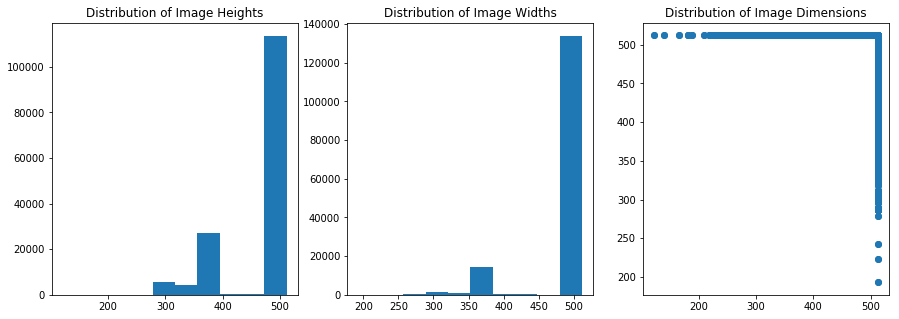

In [11]:
# plot the distribution of image heights, widths, and overall dimensions
f, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].hist(heights)
ax[0].set_title('Distribution of Image Heights')
ax[1].hist(widths)
ax[1].set_title('Distribution of Image Widths')
ax[2].scatter(heights,widths)
ax[2].set_title('Distribution of Image Dimensions')
plt.show()

In [12]:
# Determine the percent of square (width = height) images in the train dataset
squares = 0
for i in range(len(heights)):
    if heights[i] == widths[i]:
        squares += 1
print('Percent of Square Images: ' + str(squares / len(heights)))

Percent of Square Images: 0.6163432343234323


## Visually inspecting images

The below cells, allow for the visual inspection of the training dataset. The goal of this analysis is to understand the images our classifier will be tasked with classifying. We are seeking to gain familiarity with the dataset so that we can make intelligent preprocessing and training decisions. 

As evident below, there is substantial variation across the images in terms of zoom (how large the food is), blur (how clear the image is), brightness (how dark/light is the image), and color. As expected, many, but not all, of the images are 500x500 pixels. A final observation, many of the images do not only contain the food we are attempting to classify. For example, a picture in the 'omelette' class also contains toast and homefries. 

As shown in the plot of the 'churros' class below, there is substantial variation within classes.

Overall, this is a challenging image classification task. I suspect, human performance would be far less than 100%. 

In [13]:
def random_image(label='none'):
    '''
    Function that selects a random image from the train dataset. A class from the food-101 dataset can optionally 
    be provided as a string. If no class is provided, images will be generated from across all classes. The 
    function returns the filepath to that image and the respective class.
    '''
    if label == 'none':
        label = np.random.randint(0,100)
        label = list(file_dict.keys())[label]
    image = np.random.randint(0,750)
    image = file_dict[label][image]
    path = 'data/train/' + label + '/' + image
    return path, label

In [14]:
# example of what the random_image() function returns
random_image()

('data/train/ramen/1014149.jpg', 'ramen')

In [15]:
def plot_random_images(label='none'):
    '''
    Function that selects 16 random images from the train dataset and plots them in a 4x4 grid. The figure also 
    contains the associated label of each image as the subplot title. The axes of each subplot represent the pixel
    dimensions of the respective image. A class from the food-101 dataset can optionally be provided as a string. 
    If no class is provided, images will be generated from across all classes. There is nothing returned by this 
    function, rather a figure is shown.
    '''
    f, ax = plt.subplots(4,4, figsize=(20,20))
    row = 0 
    col = 0
    for row in range(4):
        for col in range(4):
            path, label_name = random_image(label=label)
            img = mpimg.imread(path)
            ax[row, col].imshow(img)
            ax[row, col].set_title(label_name)
    plt.show()

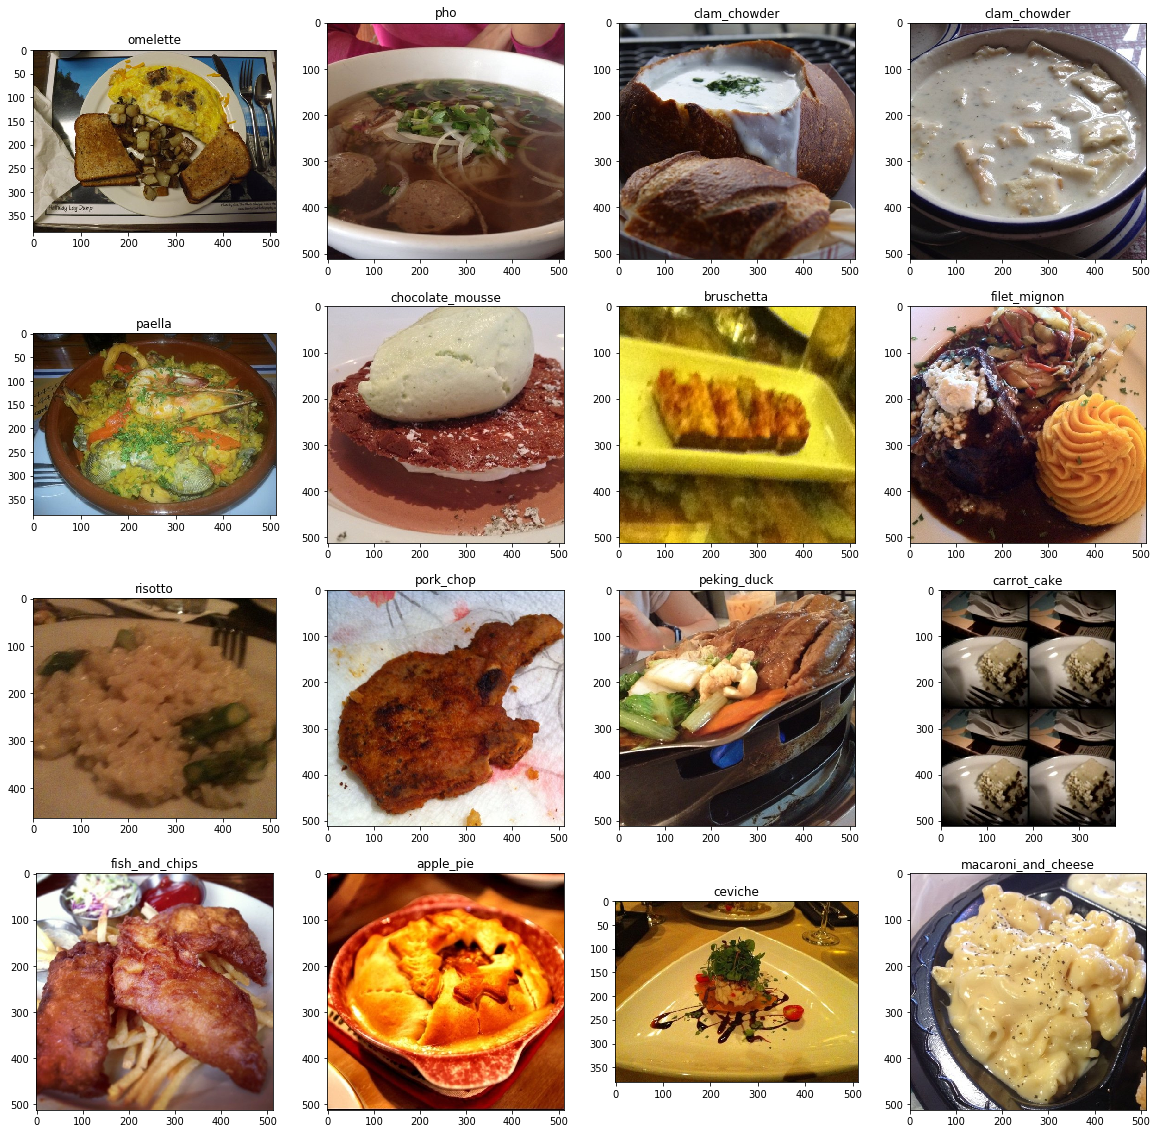

In [16]:
# plot 16 random images
plot_random_images()

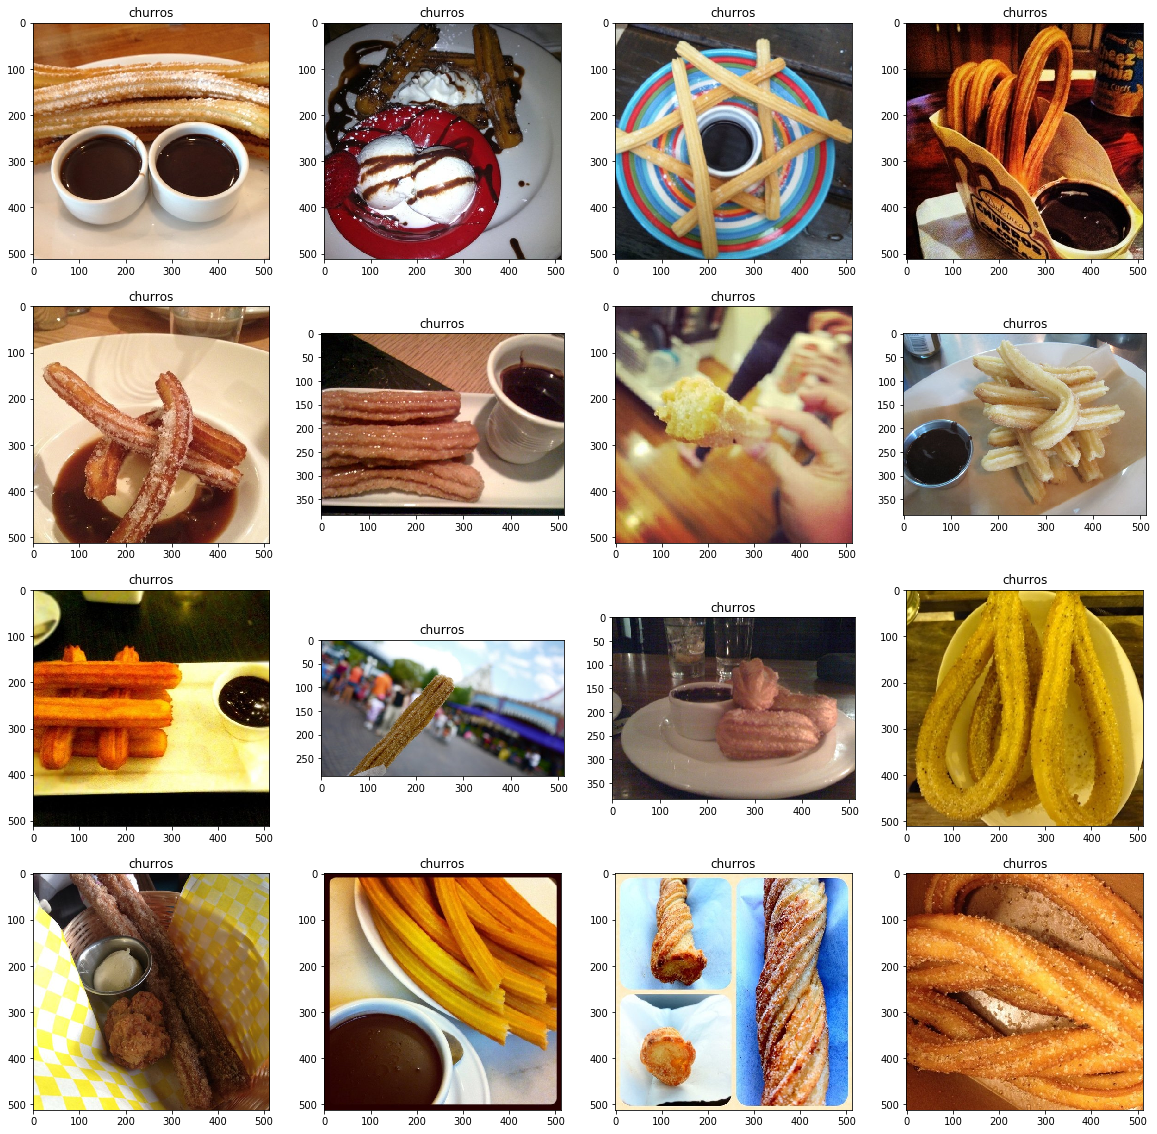

In [17]:
# plot 16 images from the churros class
plot_random_images(label='churros')

# Evaluate Potential Data Augmentations

The purpose of this analysis is to visually inspect how various image augmentations will affect the images our classifier is trained on. The purpose of image augmentation is to increase the diversity of images our classifier is trained upon. When effective, image augmentation helps a classifier generalize to non-train images better. 

That being said, too much image augmentation will reduce performance as it will inhibit the classifiers ability to detect appropriate features in the datasets; reducing ability to classify images. For this reason it is important to visually understand the impact of image augmentation before training a classifier in conjunection with a preprocessing pipeline that includes image augmentation.

After substantial manual experimentation and testing performance with various augmentations, I found that a relatively modest set of image augmentations performed best. As shown in the combined augmentation step below, this includes adjusting the brightness, rotation, and zoom of each image randomly each training epoch. 

In [18]:
def plot_img_augmentation(datagen, image_path, label):
    '''
    Function that accepts a ImageDataGenerator object, a filepath to an image in the train dataset, and the image's
    label. The function plots the images 12 times, each time augmenting the image with the ImageDataGenerator object.
    The function does not return anything, it simply shows the resulting figure. 
    '''
    img = load_img(image_path)
    data = img_to_array(img)
    samples = np.expand_dims(data,0)
    it = datagen.flow(samples, batch_size=1)
    plt.figure(figsize=(20,10))
    for i in range(9):
        plt.subplot(330+1+i)
        batch = it.next()
        image = batch[0].astype('uint8')
        plt.imshow(image)
        plt.title(label)
    plt.show()

Using TensorFlow backend.


In [19]:
# get filepath and label for a random image from the train dataset
path, label = random_image()

## Zoom Augmentation

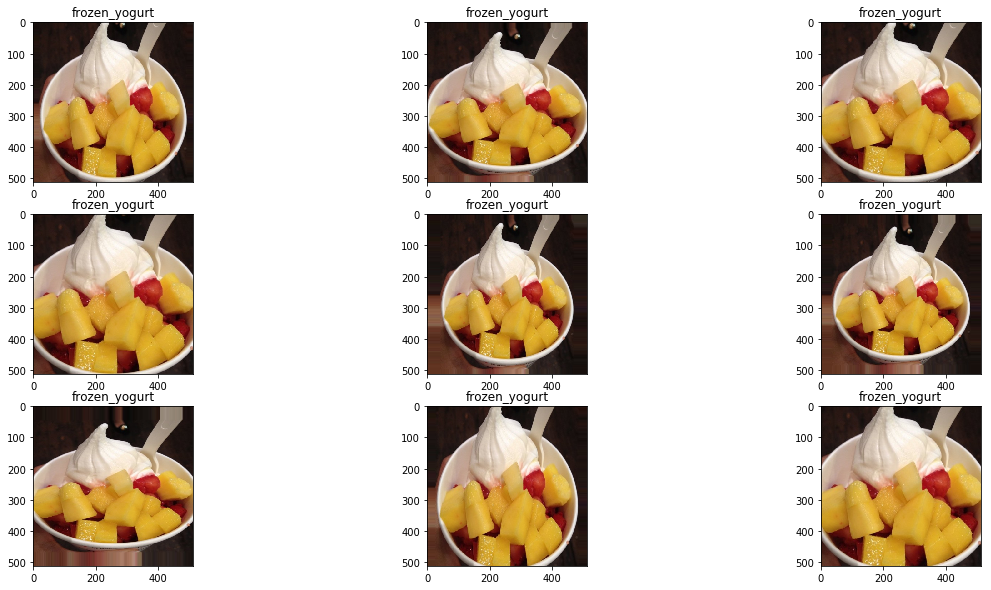

In [20]:
# visualize the impact of applying a modest zoom augmentation to the images
datagen = ImageDataGenerator(zoom_range=[0.8,1.2])
plot_img_augmentation(datagen, path, label)

## Brightness Augmentation

Note, I applied a brightness range which at times darkens images substantially. This is because, when inspecting the images I found many of them were in dark settings.


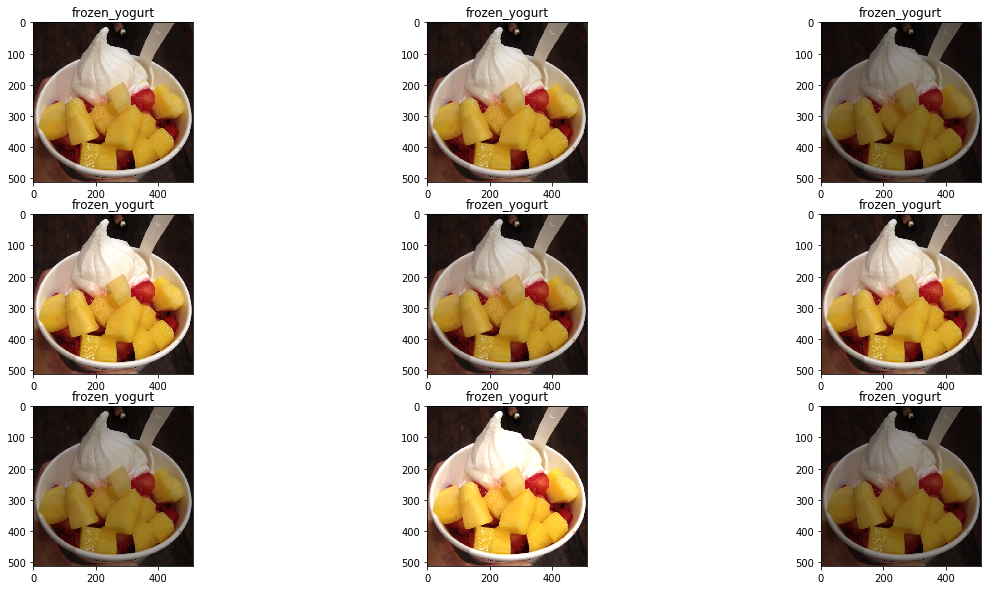

In [21]:
# visualize the impact of applying a brightness augmentation to the images
datagen = ImageDataGenerator(brightness_range=[0.5,1.2])
plot_img_augmentation(datagen, path, label)

## Random Rotation

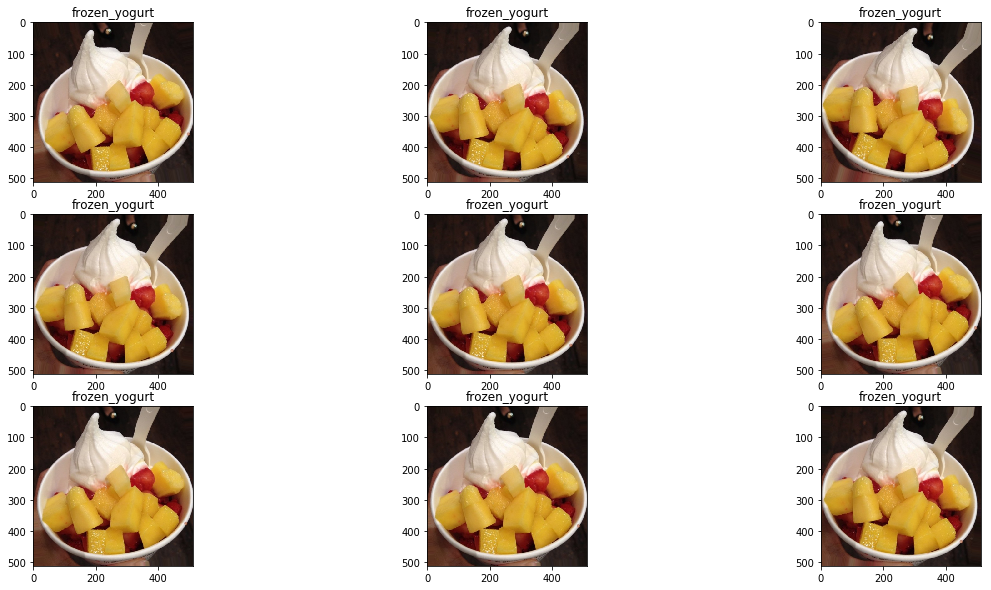

In [22]:
# visualize the impact of applying a rotation augmention to the images
datagen = ImageDataGenerator(rotation_range=20)
plot_img_augmentation(datagen, path, label)

## Combined Augmentations

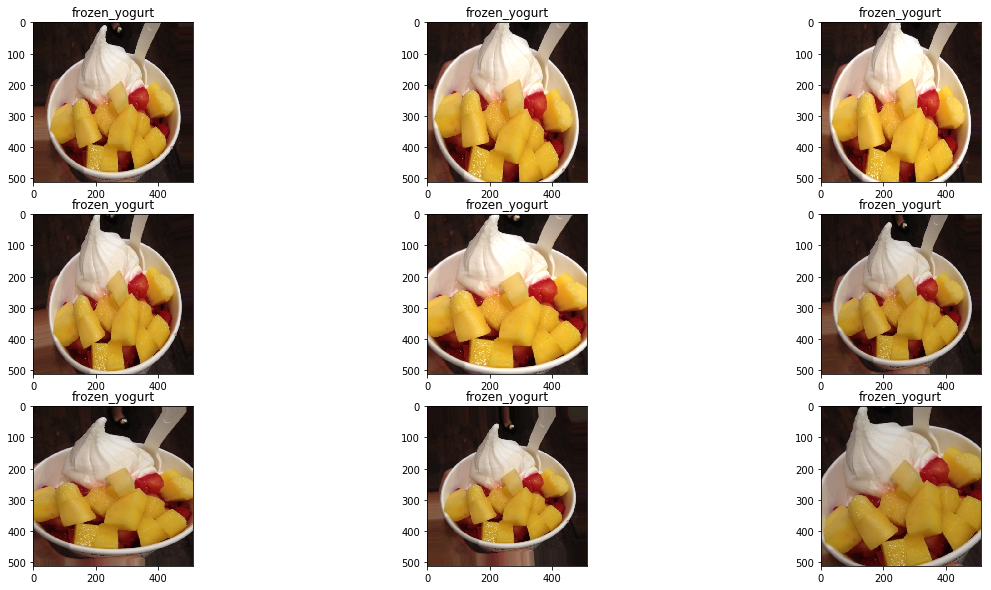

In [23]:
# visualize the impact of applying a brightness, rotation, and zoom augmentation in conjunction
datagen = ImageDataGenerator(brightness_range=[0.8,1.2],
                             rotation_range=20,
                             zoom_range=[0.8,1.2])
plot_img_augmentation(datagen, path, label)

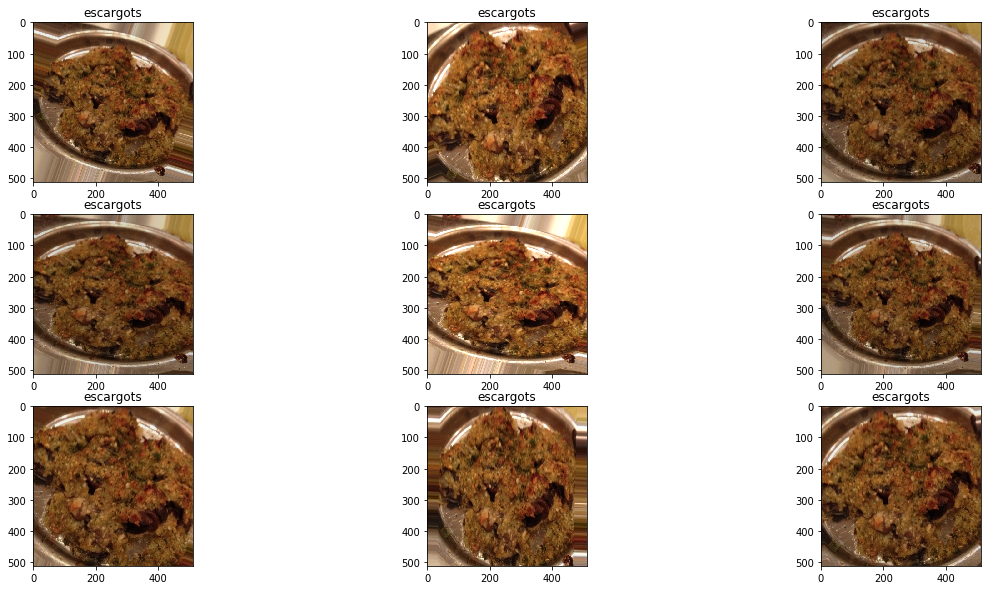

In [24]:
# visualize the impact of applying a brightness, rotation, and zoom augmentation in conjunction
path, label = random_image()
plot_img_augmentation(datagen, path, label)

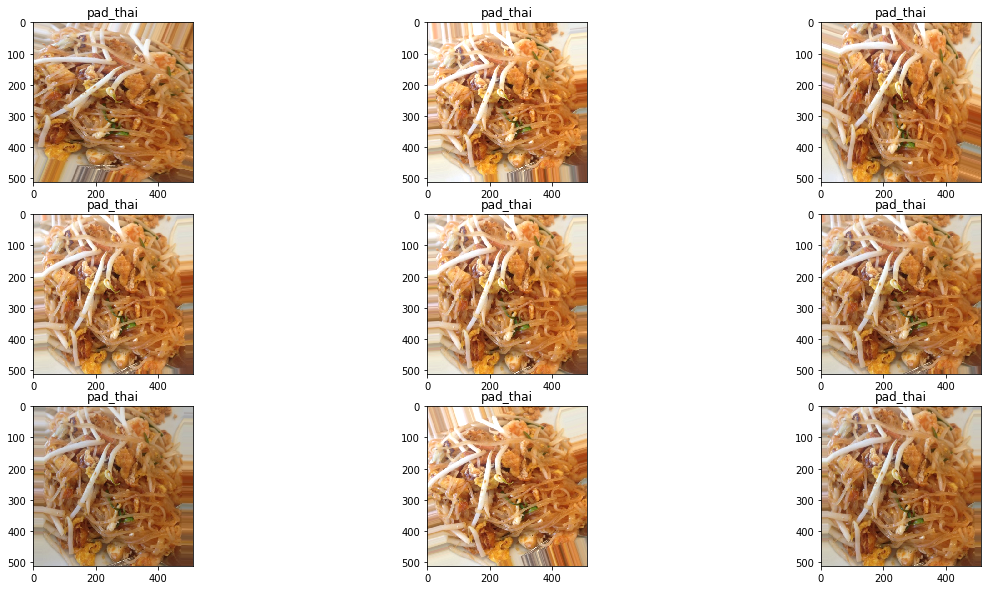

In [25]:
# visualize the impact of applying a brightness, rotation, and zoom augmentation in conjunction
path, label = random_image()
plot_img_augmentation(datagen, path, label)

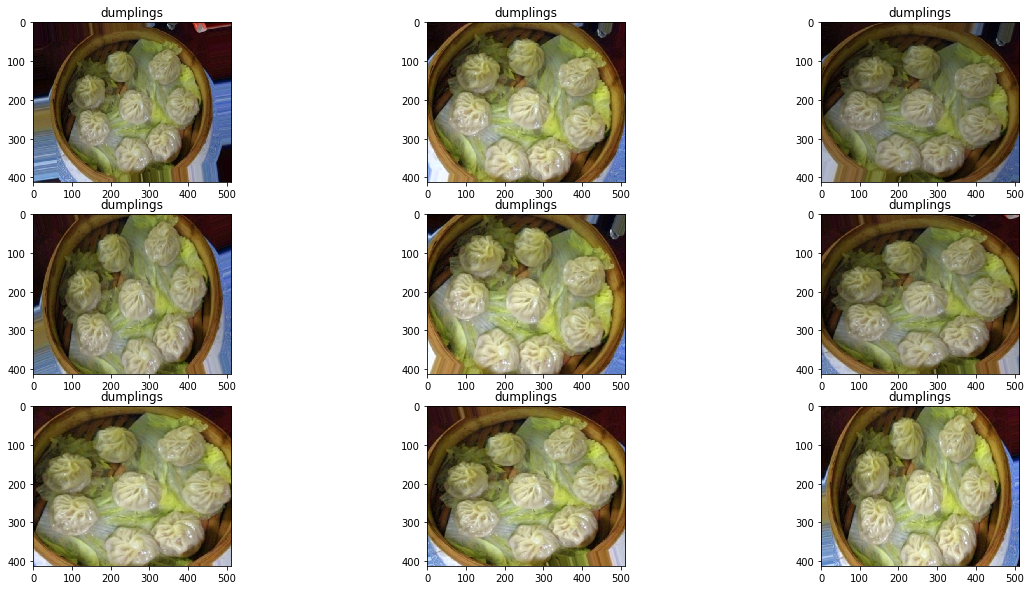

In [26]:
# visualize the impact of applying a brightness, rotation, and zoom augmentation in conjunction
path, label = random_image()
plot_img_augmentation(datagen, path, label)